In [2]:
from raman.helper import create_data_from_paths, extract_range
from pathlib import Path

In [4]:
fingers = Path("../data/pilot/s1").glob("*")
fingers = create_data_from_paths(fingers)

In [6]:
fingers[:2]

,path,spectrum,name,grating,laser,exposure,accumulation,datetime
0,../data/pilot/s1/9_600_785 nm_60 s_1_2024_03_1...,"[[-1392.31, 301.0], [-1389.3, 321.0], [-1386.2...",9,600,785 nm,60 s,1,2024-03-19 09:15:16
1,../data/pilot/s1/systemnoise2_600_785 nm_60 s_...,"[[-1392.31, 36.0], [-1389.3, 28.0], [-1386.29,...",systemnoise2,600,785 nm,60 s,1,2024-03-19 10:33:06


In [7]:
bloods = Path("../data/blood/98vs186/").glob("*")
bloods = create_data_from_paths(bloods)
bloods[:2]

,path,spectrum,name,grating,laser,exposure,accumulation,datetime
0,../data/blood/98vs186/blood101-40_600_785 nm_1...,"[[-1392.33, 128.8], [-1389.32, 126.2], [-1386....",blood101-40,600,785 nm,120 s,5,2024-09-06 10:48:10
1,../data/blood/98vs186/blood186-40_600_785 nm_1...,"[[-1392.33, 108.5], [-1389.32, 117.25], [-1386...",blood186-40,600,785 nm,120 s,5,2024-09-05 14:39:51


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def plot(data:pd.DataFrame, title:str=""):
    colors = {
        98: 'blue',
        101: 'green',
        123: 'black',
        186: 'red',
    }

    plt.figure(figsize=(16,5))
    for index, row in data.iterrows():
        X = row.spectrum[:,0]
        y = row.spectrum[:,1]
        plt.plot(X,y, label=f"{row['name']}")
    # Remove duplicate labels
    handles, labels = plt.gca().get_legend_handles_labels()
    # labels, ids = np.unique(data.glycemic, return_index=True)
    # handles = [handles[i] for i in ids]
    # plt.legend(handles, labels, loc='best')

    plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 12)
    plt.ylabel("intensity, a. u.", fontsize = 12)
    plt.title(title,fontsize = 12,fontweight="bold")
    plt.grid()
    plt.show()

# plot(data=data, title=f"Fig. 1: The raw data")
# 

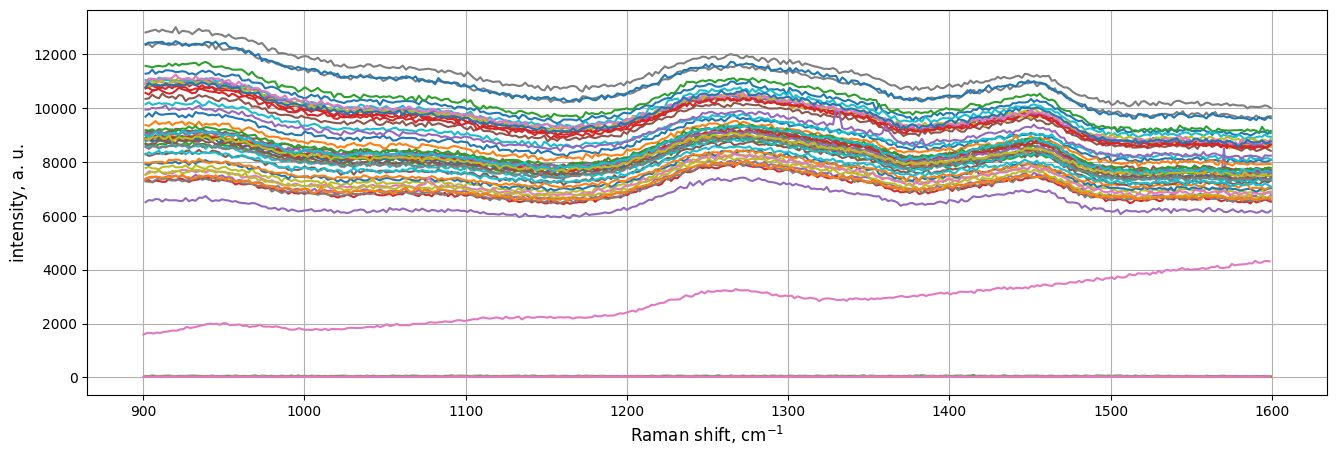

In [12]:
def cal_range(row):
    spectrum = row.spectrum
    return extract_range(spectrum=spectrum, range_from=900, range_to=1600)
fingers.spectrum = fingers.apply(cal_range, axis=1)
plot(data=fingers)
# plot(data=data, title=f"Fig. 2: The extracted range 900-1600 cm^-1")

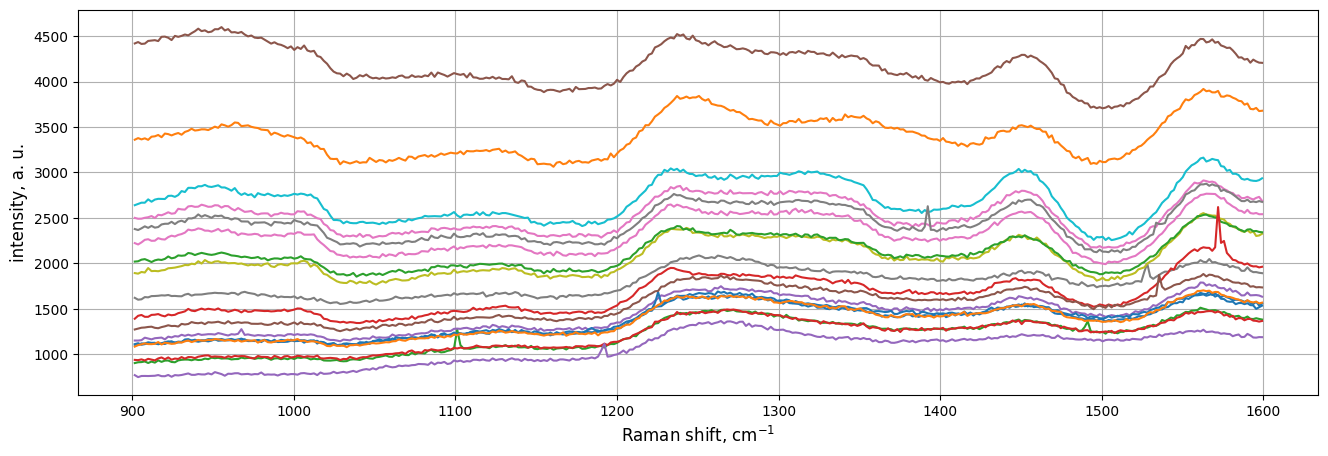

In [13]:
bloods.spectrum = bloods.apply(cal_range, axis=1)
plot(data=bloods)

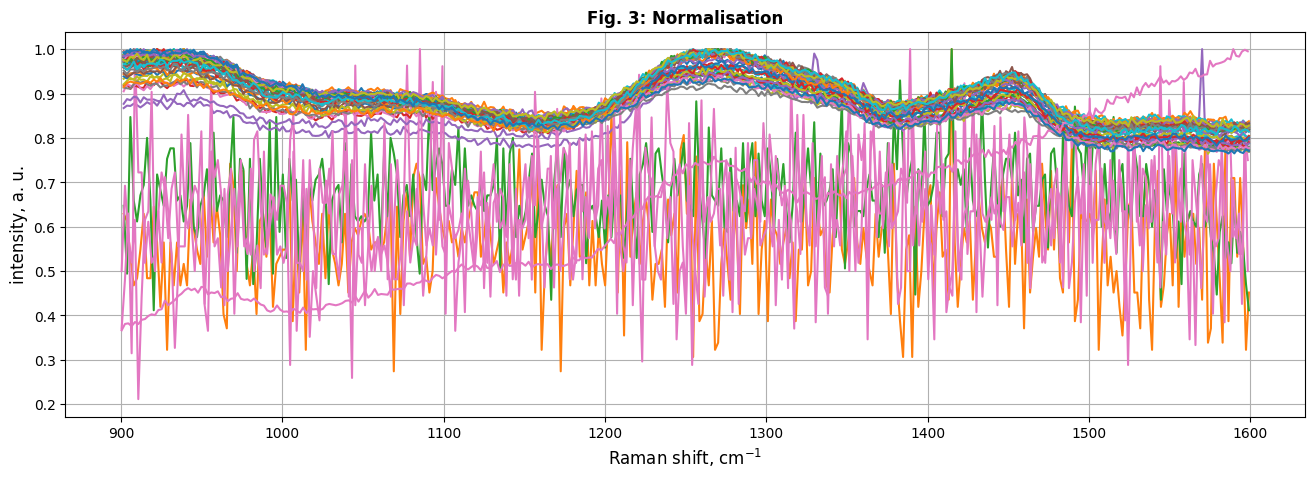

In [14]:
import rampy as rp
def normalisation(row):
    spectrum = row.spectrum
    # method : string
    # method used, choose between area, intensity, minmax
    spectrum[:,1] = rp.normalise(x=spectrum[:,0], y=spectrum[:,1], method="intensity")
    return spectrum
fingers.spectrum = fingers.apply(normalisation, axis=1)

plot(data=fingers, title=f"Fig. 3: Normalisation")

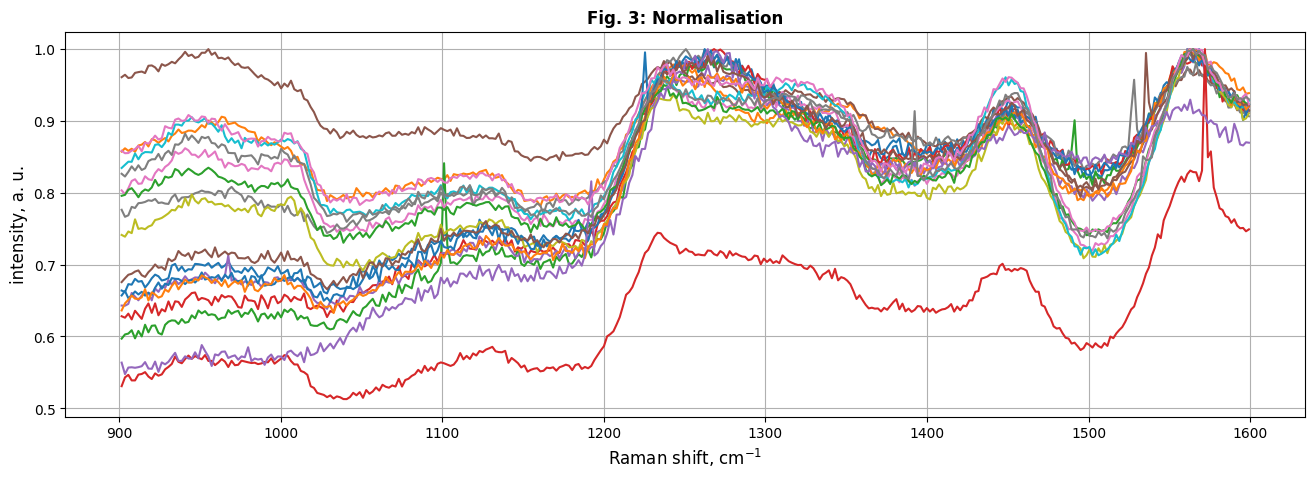

In [15]:
bloods.spectrum = bloods.apply(normalisation, axis=1)

plot(data=bloods, title=f"Fig. 3: Normalisation")

9
10
11
16
3
18
pre
7
17
6
15
18
7
4
0
10
9
20
16
14
5
8
21
3
12
14
19
1
20
13
12
17
2
22
24
19
12
23
8
21
15
5
calibrate
13
11
6
4


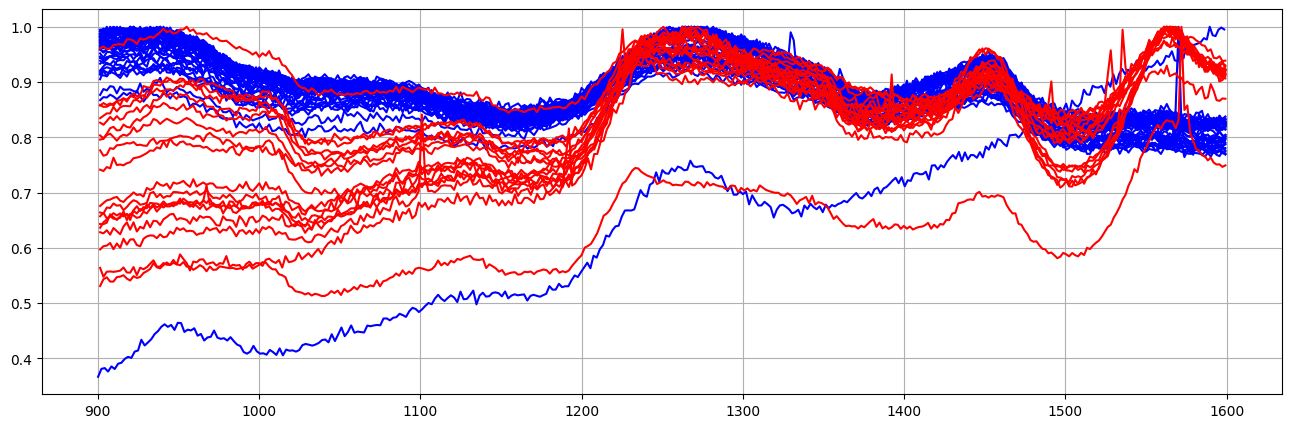

In [22]:
plt.figure(figsize=(16,5))
for index, row in fingers.iterrows():
    if(row['name'] in ['systemnoise2', 'systemnoise', 'externalnoise2', 'externalnoise']): continue
    print(row['name'])
    X = row.spectrum[:,0]
    y = row.spectrum[:,1]
    plt.plot(X,y, color='blue', label=f"finger")
for index, row in bloods.iterrows():
    X = row.spectrum[:,0]
    y = row.spectrum[:,1]
    plt.plot(X,y, color='red', label=f"finger")
# plt.legend()
plt.grid()
plt.show()